In [112]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [113]:
df=pd.read_csv('superstore_sales.csv')


In [114]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [115]:
df.shape


(51290, 21)

In [116]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [118]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [119]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


Overall sales trend

In [120]:
df['order_date'].min()

'1/1/2011'

In [121]:
df['order_date'].max()


'9/9/2014'

In [122]:
df['order_date']=pd.to_datetime(df.order_date)

In [123]:
df['sales']=pd.to_numeric(df['sales'].str.replace(',', ''))

In [124]:
df['month_year']=df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [125]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011,2011-01


In [126]:
df_trend=df.groupby('month_year').sum()['sales'].reset_index()

In [127]:
df_trend

,month_year,sales
0,2011-01,98902
1,2011-02,91152
2,2011-03,145726
3,2011-04,116927
4,2011-05,146762
5,2011-06,215214
6,2011-07,115518
7,2011-08,207570
8,2011-09,290230
9,2011-10,199070


<function matplotlib.pyplot.show(close=None, block=None)>

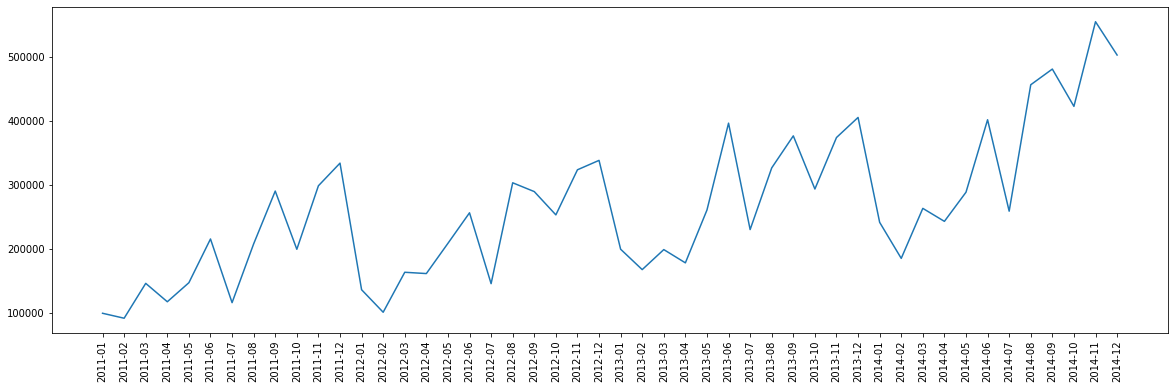

In [128]:
plt.figure(figsize=(20,6))
plt.plot(df_trend['month_year'],df_trend['sales'])
plt.xticks(rotation='vertical')
plt.show

Top 10 products by sales 

In [129]:
product_sales=df.groupby('product_name').sum()['sales']

In [130]:
product_sales.head()

product_name
"While you Were Out" Message Book, One Form per Page     25
#10 Gummed Flap White Envelopes, 100/Box                 42
#10 Self-Seal White Envelopes                           109
#10 White Business Envelopes,4 1/8 x 9 1/2              489
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 285
Name: sales, dtype: int64

In [131]:
product_sales=product_sales.sort_values(ascending=False)

In [132]:
product_sales[:10]

product_name
Apple Smart Phone, Full Size                                86936
Cisco Smart Phone, Full Size                                76441
Motorola Smart Phone, Full Size                             73159
Nokia Smart Phone, Full Size                                71904
Canon imageCLASS 2200 Advanced Copier                       61600
Hon Executive Leather Armchair, Adjustable                  58200
Office Star Executive Leather Armchair, Adjustable          50667
Harbour Creations Executive Leather Armchair, Adjustable    50120
Samsung Smart Phone, Cordless                               48654
Nokia Smart Phone, with Caller ID                           47880
Name: sales, dtype: int64

Most selling products

In [133]:
most_selling_products=df.groupby('product_name').sum()['quantity']

In [134]:
most_selling_products=most_selling_product.sort_values(ascending=False)

In [135]:
most_selling_products[:10]

product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: quantity, dtype: int64

Most preferred ship mode

<function matplotlib.pyplot.show(close=None, block=None)>

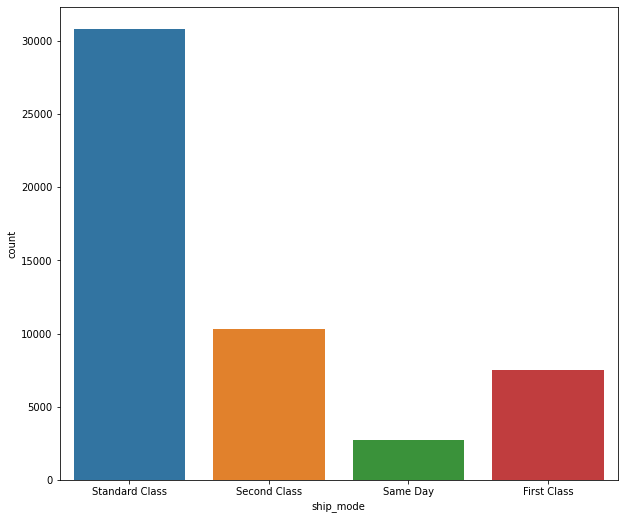

In [136]:
plt.figure(figsize=(10,8.7))
sns.countplot(df['ship_mode'])
plt.show

Most profitable category and sub-category

In [137]:
category_sub_catecory_profit=df.groupby(['category','sub_category']).sum()['profit']

In [140]:
category_sub_catecory_profit.sort_values()

category         sub_category
Furniture        Tables          -64083.38870
Office Supplies  Fasteners        11525.42410
                 Labels           15010.51200
                 Supplies         22583.26310
                 Envelopes        29601.11630
Furniture        Furnishings      46967.42550
Office Supplies  Art              57953.91090
Technology       Machines         58867.87300
Office Supplies  Paper            59207.68270
                 Binders          72449.84600
                 Storage         108461.48980
Technology       Accessories     129626.30620
Office Supplies  Appliances      141680.58940
Furniture        Chairs          141973.79750
                 Bookcases       161924.41950
Technology       Phones          216717.00580
                 Copiers         258567.54818
Name: profit, dtype: float64